# Main notebook
This notebook is able to reproduce all experiments and plots described in the reproducibility paper. The repository comes with some data and models precomputed in that case, one can simply go to the plotting section. The number of seeds can be adjusted below for small tests.

### Summary:
* ##### [Reproducing models and data for main claims.](#Reproducing-models-and-data-for-main-claims)
* ##### [Reproducing models and data for visualization.](#Reproducing-models-and-data-for-visualization)
* ##### [Reproducing original plots.](#Reproducing-original-plots)
* ##### [Additional visualization.](#Additional-visualization)


### Don't "run all" this notebook unless you're willing to wait ~6 days.

In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export

%load_ext autoreload
device = "cuda" if torch.cuda.is_available() else "cpu"
IFLOW_FOLDER = 'iFlow_experiment'
IVAE_FOLDER = 'iVAE_experiment'
IVAE_FIXED_FOLDER = 'iVAE-fixed_experiment'

iFlow_vis_folder = 'visualization_' + IFLOW_FOLDER
iVAE_vis_folder = 'visualization_' + IVAE_FOLDER 
iVAE_FIXED_vis_folder = 'visualization_' + IVAE_FIXED_FOLDER 

NUMBER_OF_SEEDS_MAIN = 100
NUMBER_OF_SEEDS_VISUALIZATION = 100

In [ ]:
cuda_flag = '-c' if device == "cuda" else ""

# Reproducing models and data for main claims
In the cells below the hyperparameters from the iFlow paper are used to reproduce the original results. For accurate reproduction you need to run it on a gpu, since the cpu you will get different results.  

For information about other paramaters consult the main.py in the iFlow folder by excuting `!python iFlow/main.py -h` in a code cell.

Note that skip connections and layer normalization can also be tested by adding the flags '-sk' and '-ln' to the iVAE.

### iFlow

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {IFLOW_FOLDER} \
            {cuda_flag} \
            '-s' '1' 

### iVAE

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FOLDER} \
            {cuda_flag} \
            '-s' '1'

### iVAE fixed

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FIXED_FOLDER} \
            {cuda_flag} \
            '-s' '1' \
            '-tm'

# Reproducing models and data for visualization
In the cells below, the data and models are produced used for the visualisation of the latent dimensions. This means that the data and latent dimension are both 2 instead of 5 as this enables us to plot on a 2D graph.

### iFlow

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {iFlow_vis_folder} \
            {cuda_flag} \
            '-s' '1' 

### iVAE

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' '-ft' 'RQNSF_AG' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {iVAE_vis_folder} \
            {cuda_flag} \
            '-s' '1'

### iVAE fixed

In [ ]:
for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' '-ft' 'RQNSF_AG' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {iVAE_FIXED_vis_folder} \
            {cuda_flag} \
            '-s' '1' \
            '-tm'

# Reproducing original plots


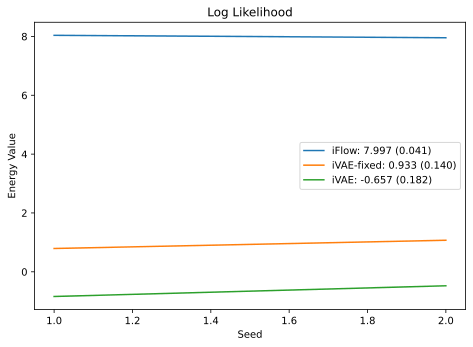

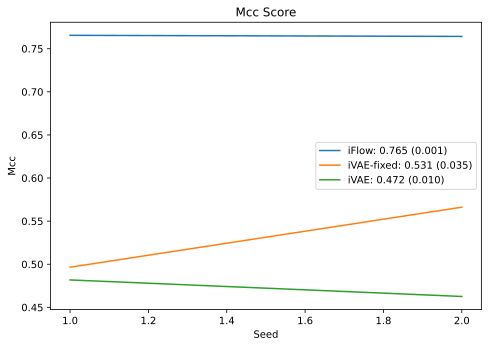

[Text(1, 0, 'iFlow_experiment'),
 Text(2, 0, 'iVAE-fixed_experiment'),
 Text(3, 0, 'iVAE_experiment')]

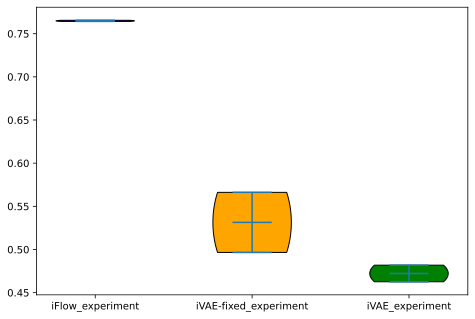

In [4]:
from plots import plot_attribute, Experiment_folder

# folder_paths = [IFLOW_FOLDER, IVAE_FOLDER]
folder_paths = [IFLOW_FOLDER, IVAE_FIXED_FOLDER, IVAE_FOLDER]
experiments = [Experiment_folder(path, device) for path in folder_paths]
ax, data = plot_attribute(experiments, "final_loss")
ax.set_title("Log Likelihood")
ax.set_xlabel("Seed")
ax.set_ylabel("Energy Value")
plt.show()

mcc_ax, data = plot_attribute(experiments, "final_performance")
mcc_ax.set_title("Mcc Score")
mcc_ax.set_xlabel("Seed")
mcc_ax.set_ylabel("Mcc")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

colors = ("blue", "orange" , "green")

parts = ax.violinplot(data[1], positions=None, vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False, quantiles=None, points=100)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

    
ax.set_xticks(np.arange(1, len(folder_paths) + 1))
ax.set_xticklabels(folder_paths)

### Plot latent correlation for iFlow - iVAE

In [ ]:
from plots import plot_latent_correlation

def get_best_model_pairs(iFlow_vis_folder, iVAE_vis_folder):
    iFlow_vis_experiments = Experiment_folder(iFlow_vis_folder, device)
    iVAE_vis_experiments = Experiment_folder(iVAE_vis_folder, device)

    top_iFlow = iFlow_vis_experiments.get_ranked_list("final_performance")[-1]
    top_iVAE = iVAE_vis_experiments.get_ranked_list("final_performance")[-1]

    best_iFlow_model, best_iFlow_dset = iFlow_vis_experiments.get_model_from_path(top_iFlow[0])
    iVAE_model, _ = iVAE_vis_experiments.get_model_from_experiment(top_iFlow)

    best_iVAE_model, best_iVAE_dset = iFlow_vis_experiments.get_model_from_path(top_iVAE[0])
    iFlow_model, _ = iFlow_vis_experiments.get_model_from_experiment(top_iVAE)
    
    return (best_iFlow_dset, best_iFlow_model, iVAE_model), (best_iVAE_dset, best_iVAE_model, iFlow_model)

In [ ]:
comparison_1, comparison_2 = get_best_model_pairs(IFLOW_FOLDER, IVAE_FOLDER)
plot_latent_correlation(comparison_1[0], comparison_1[1], 40, 453)
plot_latent_correlation(comparison_1[0], comparison_1[2], 40, 453)


plot_latent_correlation(comparison_2[0], comparison_2[1], 40, 17930)
plot_latent_correlation(comparison_2[0], comparison_2[2], 40, 17930)

### Plot latent correlation for iFlow - fixed iVAE

In [ ]:
from plots import plot_attribute, Experiment_folder

comparison_1, comparison_2 = get_best_model_pairs(IFLOW_FOLDER, IVAE_FIXED_FOLDER)
plot_latent_correlation(comparison_1[0], comparison_1[1], 40, 453)
plot_latent_correlation(comparison_1[0], comparison_1[2], 40, 453)


plot_latent_correlation(comparison_2[0], comparison_2[1], 40, 17930)
plot_latent_correlation(comparison_2[0], comparison_2[2], 40, 17930)

### 2D visualisation of comparison iFlow - iVAE

In [ ]:
from plots import create_2D_performance_plot
comparison_1, comparison_2 = get_best_model_pairs(iFlow_vis_folder, iVAE_vis_folder)


create_2D_performance_plot(comparison_1[0], comparison_1[2], comparison_1[1])

### 2D visualisation of comparison iFlow - fixed iVAE

In [ ]:
from plots import create_2D_performance_plot
comparison_1, comparison_2 = get_best_model_pairs(iFlow_vis_folder, iVAE_FIXED_vis_folder)


create_2D_performance_plot(comparison_1[0], comparison_1[2], comparison_1[1])

# Additional visualization

correlation: -1.0
correlation: 1.0
correlation: -1.0


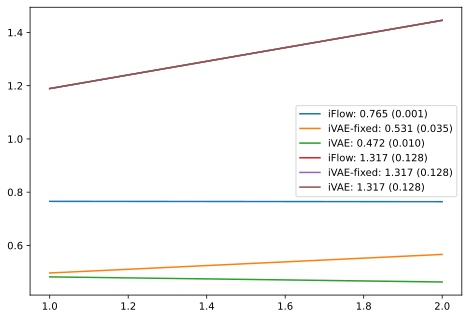

In [23]:
from numpy import corrcoef
from plots import *

for experiment in experiments:
    experiment.get_final_attribute("dataset_difficulty")

mcc_ax, vals = plot_attribute(experiments, "final_performance")
ax, vals2 = plot_attribute(experiments, "dataset_difficulty", mcc_ax)

print("correlation:", np.corrcoef(vals[1][0], vals2[1][0])[1, 0])
print("correlation:", np.corrcoef(vals[1][1], vals2[1][1])[1, 0])
print("correlation:", np.corrcoef(vals[1][2], vals2[1][2])[1, 0])

plt.show()